### Data analysis

In [14]:
import os
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
weather_df = pd.read_csv("weather/weather-010824-061024.csv")
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1658 non-null   int64  
 1   hum          1658 non-null   int64  
 2   pres         1658 non-null   int64  
 3   rain_1h      1658 non-null   float64
 4   wind_speed   1658 non-null   float64
 5   wind_deg     1658 non-null   int64  
 6   clouds_all   1658 non-null   int64  
 7   ts_get       1658 non-null   object 
 8   max_temp     1658 non-null   float64
 9   min_temp     1658 non-null   float64
 10  ave_temp     1658 non-null   float64
 11  cod_weather  1658 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 155.6+ KB


In [3]:
weather_df.head(10)

,id,hum,pres,rain_1h,wind_speed,wind_deg,clouds_all,ts_get,max_temp,min_temp,ave_temp,cod_weather
0,41752,62,1013,0.0,1.54,360,0,2024-08-01 00:00:02,28.21,25.46,27.35,800
1,41753,60,1013,0.0,1.03,0,0,2024-08-01 01:00:01,27.66,24.81,26.85,800
2,41754,66,1013,0.0,1.54,10,0,2024-08-01 02:00:03,27.10,23.81,26.16,800
3,41755,61,1012,0.0,1.03,0,0,2024-08-01 03:00:02,25.97,23.79,24.97,800
4,41756,62,1013,0.0,1.54,50,0,2024-08-01 04:00:03,25.97,22.81,24.87,800
5,41757,51,1013,0.0,0.45,202,0,2024-08-01 05:00:02,25.97,25.44,25.44,800
6,41758,47,1013,0.0,0.45,176,0,2024-08-01 06:00:03,27.66,27.64,27.66,800
7,41759,58,1013,0.0,1.54,150,0,2024-08-01 07:00:05,29.32,27.81,29.23,800
8,41760,59,1013,0.0,2.57,180,0,2024-08-01 08:00:02,30.44,28.81,30.26,800
9,41761,65,1013,0.0,3.09,170,0,2024-08-01 09:00:02,29.88,29.81,29.88,800


**Tab 1:** weather data are distributed between 01 August 2024 to 06 October 2024 and data are collected every hour.

## Pollutants

In [4]:
def feature_given_centroid(df, feature, centroid):
    """Return feature series for given centroid."""
    return df[df["centroid"] == centroid][feature]

In [5]:
pollutants_dfs = []

for datafile in os.listdir("pollutants/"):
    if "ipynb" not in datafile:
        print(f"Loading {datafile}")
        pollutants_dfs.append(pd.read_csv(f"pollutants/{datafile}"))

df_poll = pd.concat(pollutants_dfs)

Loading monitoraggio_aria_02_150824-310824.csv
Loading monitoraggio_aria_03_010924-140924.csv
Loading monitoraggio_aria_04_150924_300924.csv
Loading monitoraggio_aria_05_011024-081024.csv


In [19]:
dates = df_poll['entry_date'].unique().tolist()
print(dates)
print(len(dates))

['2024-09-07T00:00:00+00:00', '2024-09-08T00:00:00+00:00', '2024-09-09T00:00:00+00:00', '2024-09-10T00:00:00+00:00', '2024-09-11T00:00:00+00:00', '2024-09-12T00:00:00+00:00', '2024-09-13T00:00:00+00:00', '2024-09-14T00:00:00+00:00', '2024-09-15T00:00:00+00:00', '2024-09-16T00:00:00+00:00', '2024-09-17T00:00:00+00:00', '2024-09-18T00:00:00+00:00', '2024-09-19T00:00:00+00:00', '2024-09-20T00:00:00+00:00', '2024-09-21T00:00:00+00:00', '2024-09-22T00:00:00+00:00', '2024-09-23T00:00:00+00:00', '2024-09-24T00:00:00+00:00', '2024-09-25T00:00:00+00:00', '2024-09-26T00:00:00+00:00', '2024-09-27T00:00:00+00:00', '2024-09-28T00:00:00+00:00', '2024-09-29T00:00:00+00:00', '2024-09-30T00:00:00+00:00', '2024-10-01T00:00:00+00:00', '2024-10-03T00:00:00+00:00', '2024-10-04T00:00:00+00:00', '2024-10-05T00:00:00+00:00', '2024-10-06T00:00:00+00:00', '2024-10-07T00:00:00+00:00', '2024-10-08T00:00:00+00:00', '2024-10-09T00:00:00+00:00']
32


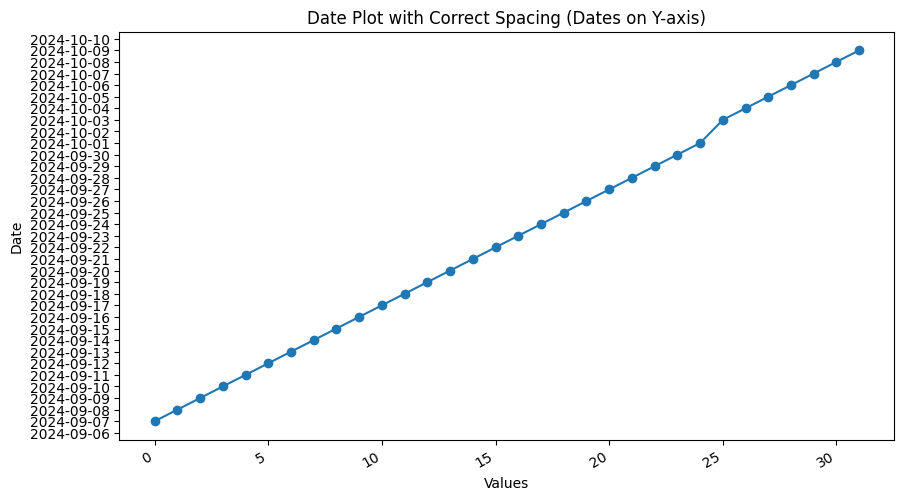

In [20]:
# Convert string dates to datetime objects
dates = [datetime.fromisoformat(date) for date in dates]

# Sample data (x-values) for plotting
x_values = list(range(len(dates)))  # Simple range for demonstration

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, dates, marker='o')

# Format the y-axis to show dates properly
plt.gca().yaxis.set_major_locator(mdates.DayLocator())  # Major ticks for each day
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Date format

# Rotate the date labels for better readability
plt.gcf().autofmt_xdate()

# Set labels and title
plt.ylabel('Date')
plt.xlabel('Values')
plt.title('Date Plot with Correct Spacing (Dates on Y-axis)')

# Display the plot
plt.show()

In [22]:
centroids = df_poll['centroid'].unique().tolist()

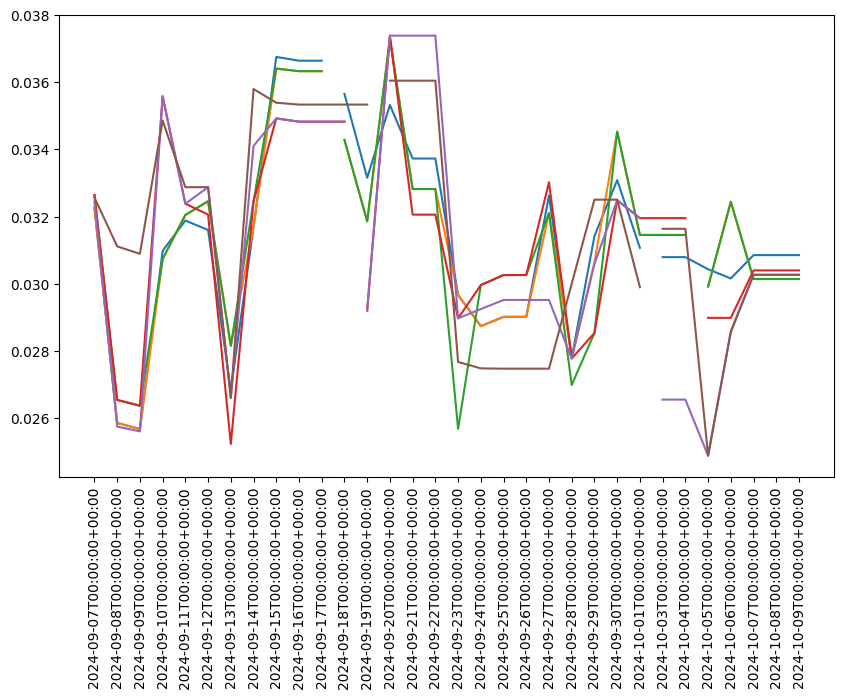

In [27]:
plt.figure(figsize=(10, 6))

# this can be isolated for each centroid
for cen in centroids[:6]:
    plt.plot(
        feature_given_centroid(df_poll, "entry_date", cen), 
        feature_given_centroid(df_poll, "CO", cen),
    )
plt.xticks(rotation=90)
plt.show()